# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 
avg_ridefare =  total_fares / total_rides


avg_ridefare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
avg_driverfare =  total_fares / total_drivers

avg_driverfare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
#  6. Create a PyBer summary DataFrame. 
type_summary_df = pd.DataFrame({
          "Total Rides" : total_rides ,
          "Total Drivers": total_drivers ,
          "Total Fares": total_fares,
          "Average Fare per Ride": avg_ridefare,
          "Average Fare per Driver": avg_driverfare})

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
type_summary_df.index.name = None

In [15]:
#  8. Format the columns.
type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [53]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_type_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_fare_type_date

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_type_date = total_fare_type_date.reset_index()
total_fare_type_date

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_date_type_pivot = total_fare_type_date.pivot(index="date", columns="type", values="fare")
fares_date_type_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [56]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_date_type_jan_apr = fares_date_type_pivot.loc[(fares_date_type_pivot.index >= "2019-01-01") & 
                                (fares_date_type_pivot.index <= "2019-04-29")]
fares_date_type_jan_apr


type,Rural,Suburban,Urban
date,,,


In [58]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fares_date_type_jan_apr.index = pd.to_datetime(fares_date_type_jan_apr.index)
fares_date_type_jan_apr

type,Rural,Suburban,Urban
date,,,


In [59]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_date_type_jan_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [60]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_week_type_jan_apr = fares_date_type_jan_apr.resample("W").sum()
fares_week_type_jan_apr

type,Rural,Suburban,Urban
date,,,


ValueError: zero-size array to reduction operation fmin which has no identity

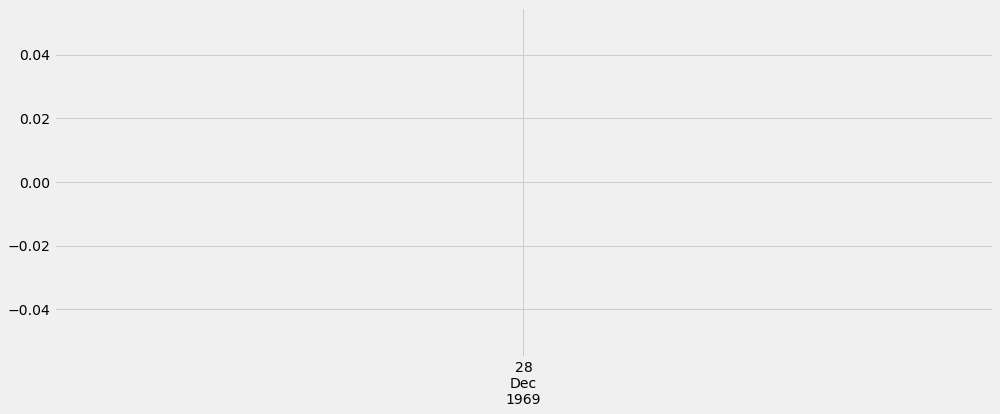

In [62]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15,6))
fares_week_type_jan_apr.plot(kind="line", ax=ax, color=["gold", "lightskyblue", "lightcoral"])
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel(" ")
lgnd = plt.legend(fontsize="12", mode="Expanded", loc=(0.8,0.5), title="City Types")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()